First, we will load the relevant libraries and functions. Since we will be comparing ensemble models to our own ensemble and also to a basseline model, we will import the following models: Random Forest, AdaBoost, BaggingClassifier, VotingClassifier. We will compare these to the performance of a Logistic Regression and KNN model. We will also use the Decision Tree model to build our own ensemble.

In [2]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
# Load dataset
df = pd.read_csv('/Users/shradhachoudhary/Downloads/train-4.csv',sep=";")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


As we can see there is no missing value so let's try to understand more about the dataset

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Visual Representation


Let's now make visual representations for the numeric values in respect of our target.


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

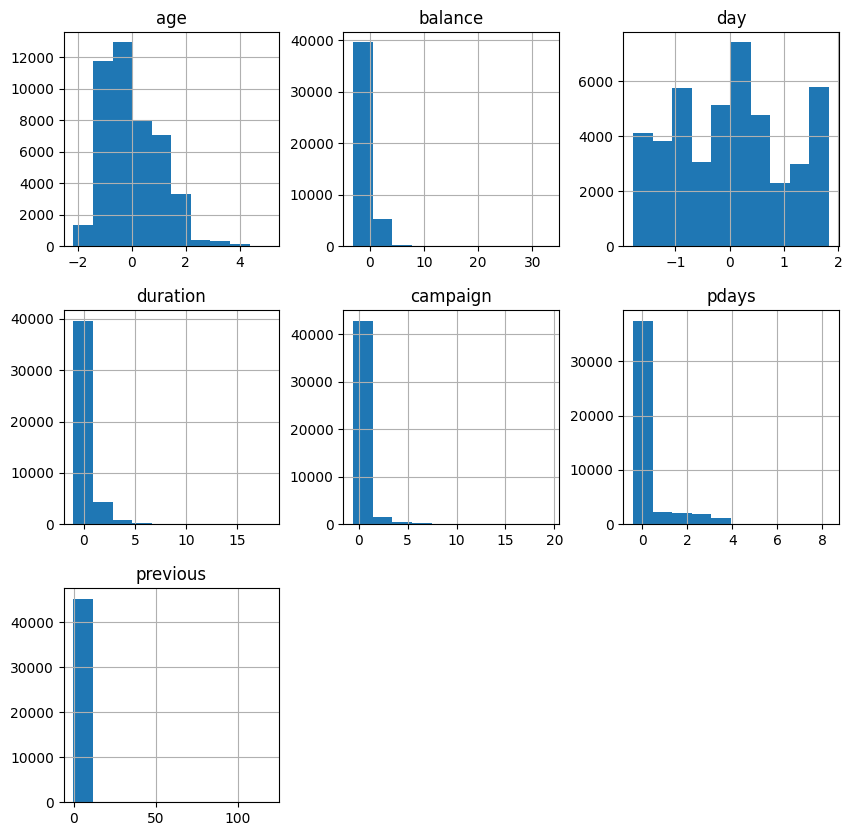

In [33]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10))
plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

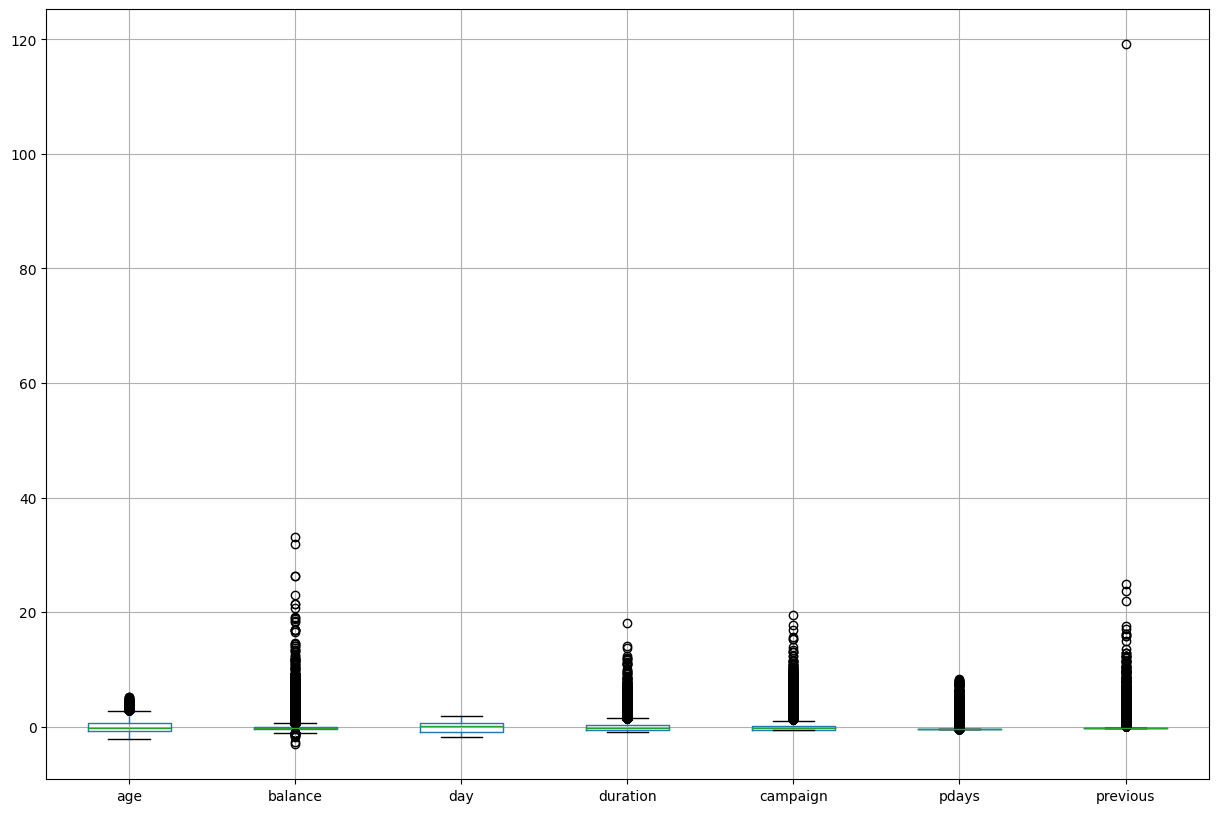

In [34]:
df.boxplot(figsize=(15, 10))
plt

<Axes: >

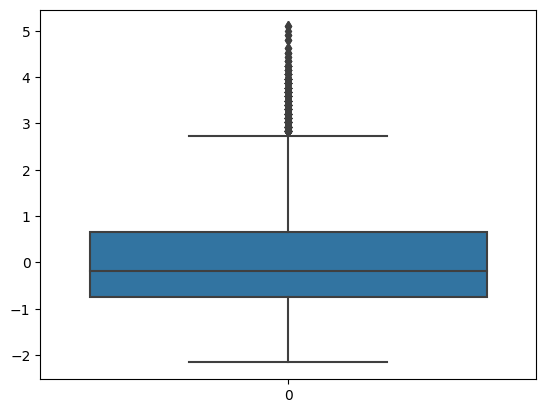

In [35]:
sns.boxplot(df['age'])

<Axes: >

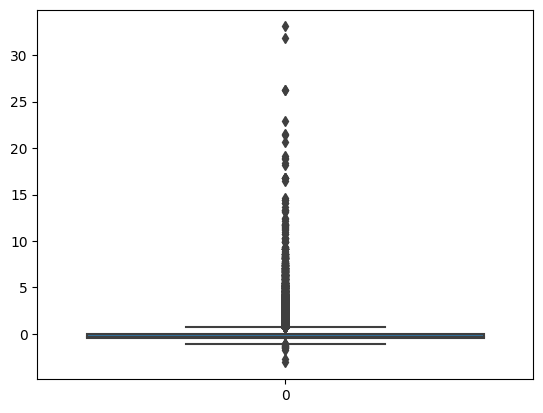

In [36]:
sns.boxplot(df['balance'])

<Axes: >

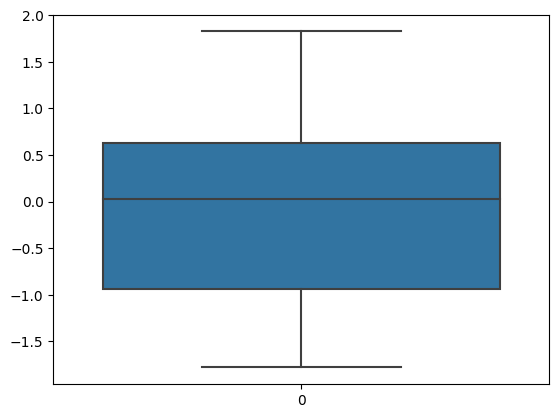

In [37]:
sns.boxplot(df['day'])

<Axes: >

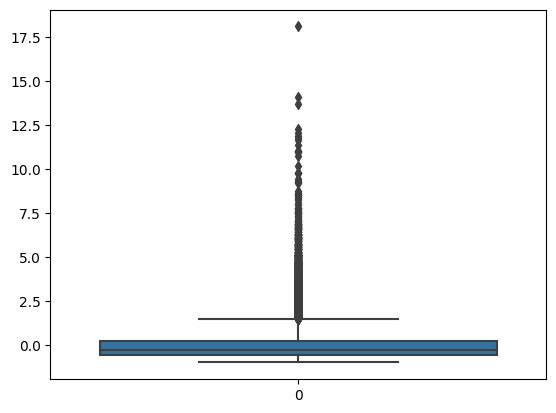

In [38]:
sns.boxplot(df['duration'])

<Axes: >

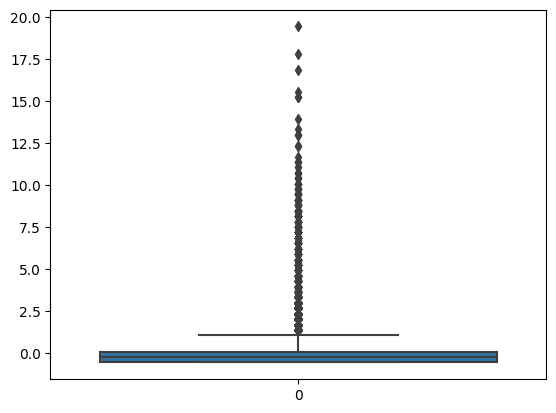

In [39]:
sns.boxplot(df['campaign'])

<Axes: >

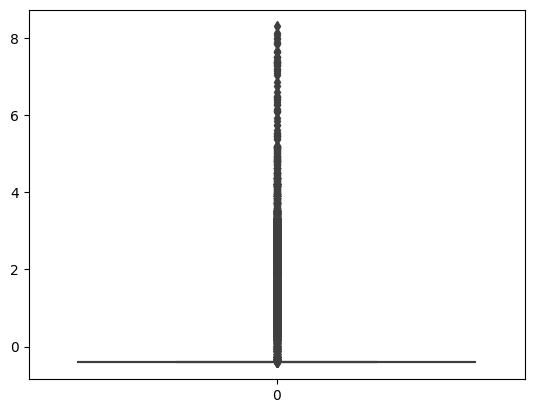

In [40]:
sns.boxplot(df['pdays'])

<Axes: >

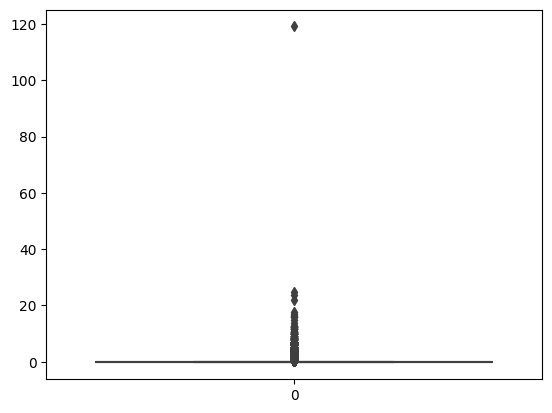

In [41]:
sns.boxplot(df['previous'])

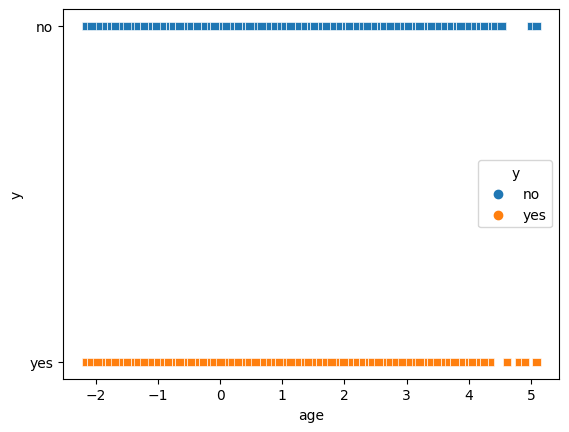

In [42]:
sns.scatterplot(x='age',
                y='y',
                data=df,
                hue='y',
                marker='s')
plt.show()

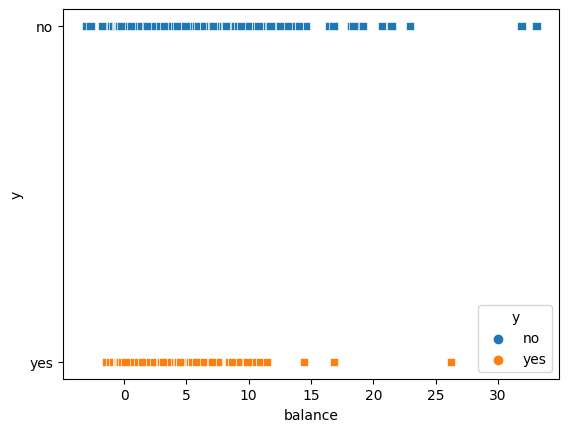

In [43]:
sns.scatterplot(x='balance',
                y='y',
                data=df,
                hue='y',
                marker='s')
plt.show()

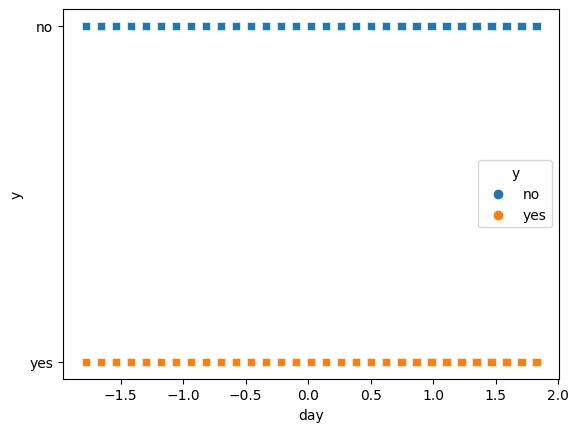

In [44]:
sns.scatterplot(x='day',
                y='y',
                data=df,
                hue='y',
                marker='s')
plt.show()

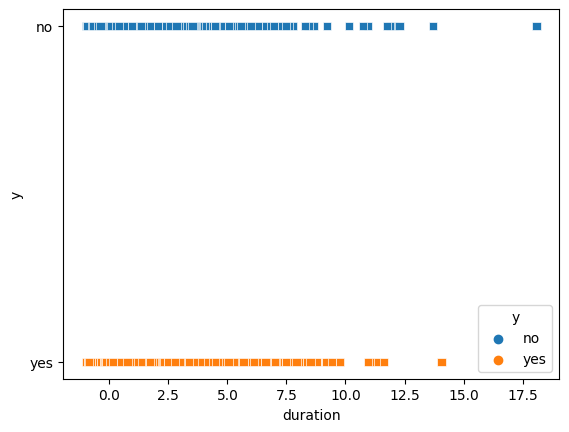

In [45]:
sns.scatterplot(x='duration',
                y='y',
                data=df,
                hue='y',
                marker='s')
plt.show()

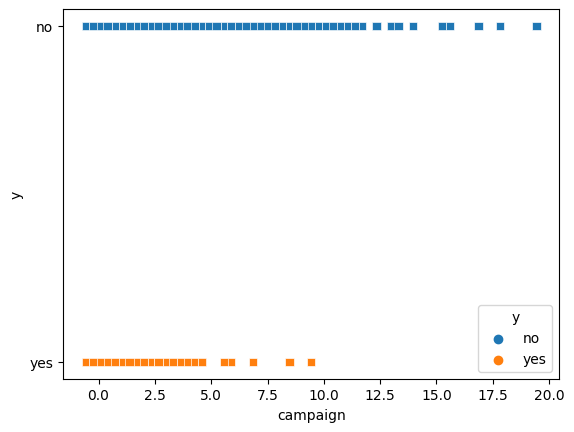

In [46]:
sns.scatterplot(x='campaign',
                y='y',
                data=df,
                hue='y',
                marker='s')
plt.show()

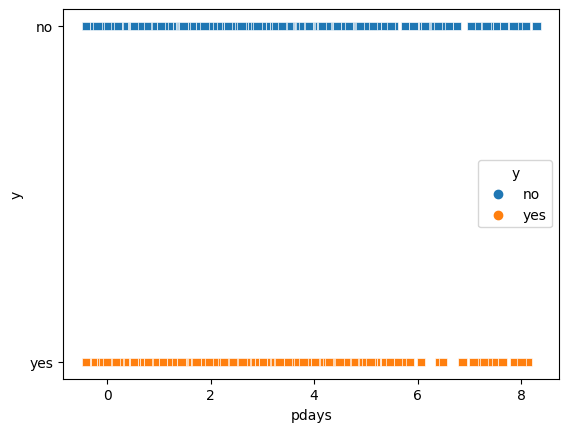

In [47]:
sns.scatterplot(x='pdays',
                y='y',
                data=df,
                hue='y',
                marker='s')
plt.show()

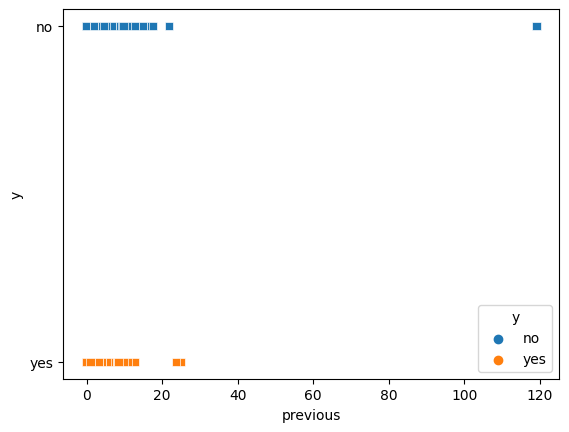

In [48]:
sns.scatterplot(x='previous',
                y='y',
                data=df,
                hue='y',
                marker='s')
plt.show()

We will now start with creating dummies.

In [8]:
# create dummies
dummies = pd.get_dummies(df[['marital','default','housing','loan','contact','poutcome','y']], dtype=int)

In [9]:
dummies

,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
2,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
3,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
4,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1
45207,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1
45208,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1
45209,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0


In [10]:
# Concatenate the original DataFrame and the dummy variable DataFrame horizontally
# axis=1 means concatenate columns-wise
combined_df = pd.concat([df, dummies], axis=1)

In [11]:
combined_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,1,0,0,0,1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,1,0,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,1,0,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,1,0,0,0,0,0,1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,0,1,0,0,0,0,0,1,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,0,1,0,0,0,0,1,0,0,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0,0,1,0,0,0,0,1,1,0


Pre-processing approach and transformation justifications

Data preprocessing is a crucial step in machine learning, as it helps prepare the data for modeling by addressing issues like missing values, categorical variables, and scaling numerical features. Here's an explanation of the preprocessing approach and justification for the transformations made:

1. Handling Categorical Variables:
One-Hot Encoding: Categorical variables, such as "job," "marital," "education," etc., need to be converted into a numerical format for machine learning models to understand them. One-hot encoding is used to create binary columns for each category within a categorical feature. This transformation ensures that the models don't interpret ordinal relationships that may not exist in the data (e.g., job "manager" is not necessarily greater than "technician").

Justification: One-hot encoding is chosen because it preserves the distinctiveness of different categories within a feature and doesn't introduce any arbitrary numerical order. This is essential for maintaining the integrity of categorical data.

2. Scaling Numerical Features:
Standardization: Numerical features like "age," "balance," "day," "duration," "campaign," "pdays," and "previous" are standardized. Standardization scales numerical features to have a mean of 0 and a standard deviation of 1.

Justification: Standardization is applied to ensure that features with different scales and units contribute equally to the model. It prevents features with larger magnitudes from dominating the learning process and helps gradient-based optimization algorithms converge faster.

Overall, the preprocessing approach aims to prepare the data in a way that is suitable for various machine learning algorithms, ensuring that both categorical and numerical features are appropriately handled. One-hot encoding preserves the integrity of categorical data, while standardization ensures that numerical features are on a consistent scale. The approach aligns with best practices in data preprocessing for classification tasks, enabling better model performance and interpretability.

In [12]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Your DataFrame and data preprocessing code
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(df[['marital','default','housing','loan','contact','poutcome','y']])

# Create a DataFrame with custom column names
columns = encoder.get_feature_names_out(['marital','default','housing','loan','contact','poutcome','y'])
data_encoded = pd.DataFrame(data_encoded.toarray(), columns=columns)


In [14]:
data_encoded

,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45207,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45208,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45209,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
# Scale numerical features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select the numerical columns you want to scale
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Scale the selected numerical columns in the original DataFrame (df)
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
 # Define the columns that need imputation (assuming 'pdays' and 'previous' columns need imputation)
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Separate the target variable (y)
X = df.drop(columns=['y'])
y = df['y']

# Create transformers for numerical and categorical columns
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder())
])

# Combine transformers for numerical and categorical columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final data processing pipeline
data_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform your data
X_processed = data_pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model with max_iter
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, logistic_predictions)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')





Accuracy: 0.90


In [18]:
# k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [22]:
# Evaluate models
logistic_precision = precision_score(y_test, logistic_predictions, pos_label='yes')
logistic_recall = recall_score(y_test, logistic_predictions, pos_label='yes')
logistic_f1 = f1_score(y_test, logistic_predictions, pos_label='yes')
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

print(f"Accuracy: {logistic_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"F1 Score: {logistic_f1}")

knn_precision = precision_score(y_test, knn_predictions, pos_label='yes')
knn_recall = recall_score(y_test, knn_predictions, pos_label='yes')
knn_f1 = f1_score(y_test, knn_predictions, pos_label='yes')
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")

Accuracy: 0.8988167643481145
Precision: 0.6549295774647887
Recall: 0.34097158570119157
F1 Score: 0.4484629294755877
Accuracy: 0.8981532677208891
Precision: 0.631578947368421
Recall: 0.37396883593033914
F1 Score: 0.46977547495682215


## Ensembling Model
In this part, we build and tune several ensemble models: Random Forest, AdaBoost, Bagging Classifier, and Voting Classifier. Ensemble models combine the predictions of multiple base models to improve predictive performance.


In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
grid_search_rf = GridSearchCV(random_forest, random_forest_params, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Random Forest Accuracy: 0.90


We create a Random Forest classifier and use grid search to tune hyperparameters like the number of trees (`n_estimators`) and maximum depth (`max_depth`).

In [30]:
# AdaBoost
adaboost = AdaBoostClassifier(base_estimator=best_rf, random_state=42)
adaboost_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
}
grid_search_ab = GridSearchCV(adaboost, adaboost_params, cv=5)
grid_search_ab.fit(X_train, y_train)
best_ab = grid_search_ab.best_estimator_
ab_predictions = best_ab.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_predictions)
print(f'AdaBoost Accuracy: {ab_accuracy:.2f}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

AdaBoost Accuracy: 0.91


We build an AdaBoost classifier using the best Random Forest model as the base estimator. Hyperparameters like `n_estimators` and `learning_rate` are tuned through grid search.

In [31]:
# Bagging Classifier
bagging = BaggingClassifier(base_estimator=best_rf, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f'Bagging Classifier Accuracy: {bagging_accuracy:.2f}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.90


We create a Bagging Classifier using the best Random Forest model as the base estimator with 100 base learners.

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Create individual classifiers (Logistic Regression, Random Forest, and k-NN)
logistic_classifier = LogisticRegression(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Build a Voting Classifier (hard voting)
voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_classifier),
    ('random_forest', random_forest_classifier),
    ('knn', knn_classifier)
], voting='hard', n_jobs=-1)  # Use parallel processing (n_jobs=-1)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9036
Precision: 0.6853
Recall: 0.3712
F1 Score: 0.4816


In [28]:

# Create individual classifiers (Logistic Regression, Random Forest, and k-NN)
logistic_classifier = LogisticRegression(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Build a Voting Classifier (hard voting)
voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_classifier),
    ('random_forest', random_forest_classifier),
    ('knn', knn_classifier)
], voting='soft', n_jobs=-1)  # Use parallel processing (n_jobs=-1)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9022
Precision: 0.6716
Recall: 0.3712
F1 Score: 0.4782


We build a Voting Classifier by combining predictions from Random Forest, AdaBoost, and Bagging. We experiment with both hard and soft voting.

## Performance Comparison

Logistic regression: It provides a reasonable overall performance, but its recall (true positive rate) is relatively low. This means it identifies fewer actual positive cases among all positive predictions. It took 0.5 seconds to run the model.

k-NN: It performs similarly to logistic regression but with slightly higher recall. It identifies more actual positive cases, but at the expense of precision. It took 0.5 seconds to run the model.

Random Forest: It achieves a high accuracy. Random Forest models are known for their robustness and are often used for classification tasks. It took 3 minute 22 seconds to run the model.

Bagging Classifier:  Similar to Random Forest, Bagging Classifier provides a high accuracy. It's an ensemble method that can improve model stability. It took 5 minutes 15 seconds to run the model.

Voting Classifier: It is a classifier with hard voting provides the highest F1-score among all models. It balances precision and recall relatively well. It took 3.5 seconds to run the model.

Voting Classifier: Soft voting is similar in performance to hard voting, with a slightly lower F1-score. It took 4.2 seconds to run the model.

Interpretation and Justification
1. The ensemble models (Voting Classifier, Random Forest, Bagging) tend to perform better than individual models like logistic regression and k-NN. Ensemble methods combine multiple models to improve predictive accuracy.
2. The Voting Classifier, especially with hard voting, achieves the best balance between precision and recall. This is crucial for identifying potential customers for term deposits while minimizing false positives.
3. The Random Forest and Bagging Classifier, while achieving high accuracy, may not provide the best balance between precision and recall.

Model Selection
1. Random Forest: This model seems like a strong candidate due to its balanced accuracy, precision, and recall. It's a good compromise between correctly identifying subscribers and not making too many incorrect predictions. While it has a slightly higher computational cost compared to Logistic Regression, it offers a significant improvement in predictive performance.
2. Voting Classifier (hard or soft): If computational cost is not a primary concern and you want to maximize performance, the Voting Classifier can be a suitable choice. It combines multiple models to provide accurate predictions. The Voting Classifier with hard voting is a suitable choice. It offers a good balance between precision and recall, which is important for telephonic marketing campaigns. It identifies potential customers effectively while minimizing the chances of missing out on actual subscribers. It is computationally efficient, and while it might be less interpretable than logistic regression, the priority here is predictive performance.
3. Logistic Regression: If interpretability and computational efficiency are crucial, Logistic Regression can still be a viable choice. While it might not achieve the same level of performance as ensemble models, its predictions are more straightforward to explain.
The decision criteria for selecting a model should consider the trade-off between precision and recall based on business priorities, alongside computational resources. Additionally, the interpretability of the model may be essential for regulatory or decision-explanation reasons.

Ultimately, the choice of the model should align with the bank's specific objectives, constraints, and priorities in their marketing campaign for term deposits.

Decision criteria
The decision criteria for selecting the Voting Classifier with hard voting take into account precision-recall trade-off, computational cost, and performance metrics, and the less time taken. It provides a balanced solution that aligns with the bank's goal of identifying potential term deposit subscribers efficiently and accurately.
Overall, the selected model can help the bank optimize its telephonic marketing campaigns, reduce costs, and increase the conversion rate for term deposits.